In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
# load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
718,2014,MAZDA,MX-5,TWO-SEATER,2.0,4,AS6,Z,11.5,8.5,10.2,28,235
634,2014,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,A6,Z,18.0,12.8,15.7,18,361
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,9.8,6.4,8.3,34,224
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25,262


In [67]:
# describe the statistical properties of the dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [68]:
# show more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [69]:
# drop redundant categorical variables (same from previous example)
df.drop(columns= ["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"], inplace = True)
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1005,5.7,8,17.6,12.9,15.5,18,356
14,4.7,8,17.4,11.3,14.7,19,338
992,2.5,4,10.6,8.2,9.5,30,218
698,2.5,4,9.8,7.9,8.9,32,205
381,5.0,8,16.4,12.3,14.6,19,336


In [70]:
# print the correlation table
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


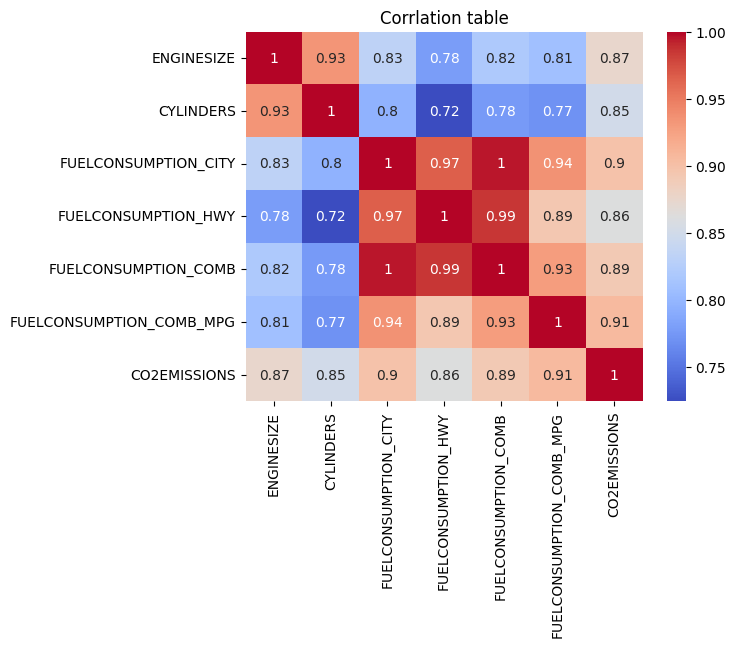

In [71]:
# heatmap plot
sb.heatmap(np.abs(df.corr()), cmap = "coolwarm", annot = True)
plt.title("Corrlation table")
plt.show()

In [80]:
X = df[["FUELCONSUMPTION_COMB", "ENGINESIZE"]]
y = df["CO2EMISSIONS"]

In [ ]:
# Explanation of why we didnt use the fuelconsumption_comb_mpg (THIS CELL IS COPY PASTED FROM THE COURSE)

# You would expect that for the limiting case of zero ENGINESIZE and zero FUELCONSUMPTION_COMB_MPG,
#  the resulting CO2 emissions should also be zero. This is inconsistent with the 'best fit' hyperplane,
#  which has a non-zero intercept of 329 g/km. The answer must be that the target variable does not have a very strong linear relationship to the dependent variables,
#  and/or the data has outliers that are biasing the result. Outliers can be handled in preprocessing, or as you will learn about later in the course,\
#  by using regularization techniques. One or more of the variables might have a nonlinear relationship to the target.
#  Or there may still be some colinearity amongst the input variables.

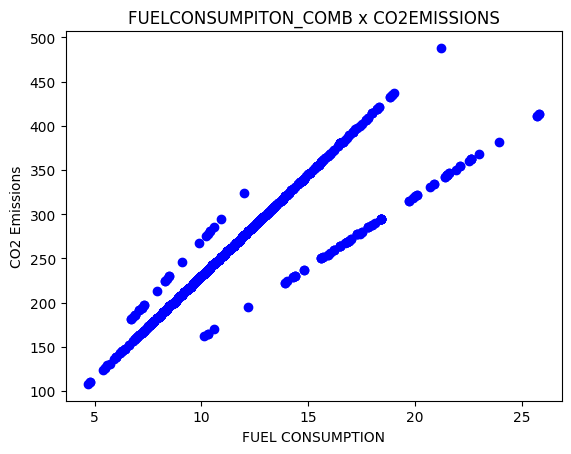

In [93]:
plt.scatter(X.iloc[:, 0], y, color = "blue")
plt.title("FUELCONSUMPITON_COMB x CO2EMISSIONS")
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 Emissions")
plt.show()

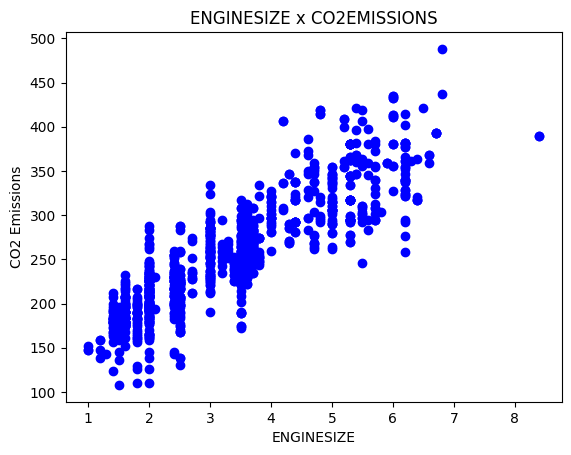

In [90]:
plt.scatter(X.iloc[:, 1], y, color = "blue")
plt.title("ENGINESIZE x CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 Emissions")
plt.show()

In [81]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

X_scaled = se.fit_transform(X)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [91]:
# train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# so we can see that the fuel consumption comb has more effect on output than the enginesize
# howver because we standardized(using z-score) it they are close to each other 
print("The weights are : ", model.coef_)            
print("The bias = ", model.intercept_)

The weights are :  [33.51026855 27.72838436]
The bias =  256.55856797792757


In [ ]:
# to print weights and bias before scaling 
# zscore = for each datapoint ,    (datapoint - mean)/std


In [84]:
print(model.predict([[5, 10]]))

[701.39375435]


In [85]:
from sklearn.metrics import r2_score

print("R2 score = ", r2_score(y_test, model.predict(X_test)))

R2 score =  0.8685405139405122
